In [1]:
# Wczytanie bibliotek

%pylab inline
import pandas as pd
from tabulate import tabulate
import os
import keras
import joblib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Wczytanie sieci nizszego rzedu

model_Artist = keras.models.load_model("C:/Users/jarek/ARTIST62_best_model.hdf5")
model_Style = keras.models.load_model("C:/Users/jarek/STYLE32_best_model.hdf5")
model_Genre = keras.models.load_model("C:/Users/jarek/GENRE72_best_model.hdf5")
model_Century = keras.models.load_model("C:/Users/jarek/CENTURY62_best_model.hdf5")

In [3]:
# Wczytanie najlepszych sieci i klasyfikatorów wyzszego rzedu

artist_classificator = joblib.load("C:/MAG/Artysta_wyzszy/LR.joblib")
artist_NN_predictor = keras.models.load_model("C:/MAG/Artysta_wyzszy/model_1.hdf5")

genre_classificator = joblib.load("C:/MAG/Gatunek_wyzszy/LR.joblib")
genre_NN_predictor = keras.models.load_model("C:/MAG/Gatunek_wyzszy/model_1.hdf5")

style_classificator = joblib.load("C:/MAG/Styl_wyzszy/LR.joblib")
style_NN_predictor = keras.models.load_model("C:/MAG/Styl_wyzszy/model_1.hdf5")

century_classificator = joblib.load("C:/MAG/Wiek_wyzszy/LR.joblib")
century_NN_predictor = joblib.load("C:/MAG/Wiek_wyzszy/NN.joblib")

In [4]:
# Baza danych

images_dir = "C:/wikiart/"
df = pd.read_csv('C:/wikiart/wclasses.csv')
training_imgs = list(images_dir + df['file'])
df['filepath'] = training_imgs

df['century']=df['artist']

for i in df.index:
  filename = os.path.basename(df['file'][i])
  parts = filename.split('-')
  yearonly = parts[len(parts)-1].split('.')[0]
  try:
    yearonly=int(yearonly) 
  except ValueError:
    yearonly=None

  try:
    if 1900<yearonly<2001:
      df['century'][i]=20
    elif 1800<yearonly<1901:
      df['century'][i]=19
    elif 1700<yearonly<1801:
      df['century'][i]=18
    elif 1600<yearonly<1701:
      df['century'][i]=17
    elif 1500<yearonly<1601:
      df['century'][i]=16
    elif 1400<yearonly<1501:
      df['century'][i]=15
    else:
      df['century'][i]=-1
  except TypeError:
    df['century'][i]=-1
    
df['Artist_name'] = df.file.str.split("/",expand=True)[1]
df['Artist_name'] = df.Artist_name.str.split("_",expand=True)[0]

style_number = list(range(27))
style_number = [x+140 for x in style_number]

genre_number = list(range(11))
genre_number = [x+129 for x in genre_number]

century_number1=[-1]
century_number = list(range(6))
century_number = [x+15 for x in century_number]
century_number = century_number1 + century_number

columns_style = ['Ekspresjonizm Abstrakcyjny', 'Taszyzm', 'Kubizm Analityczny', 'Art Noveau', 'Barok', 'Malarstwo Barwnych Płaszczyzn', 'Realizm Współczesny', 'Kubizm', 'Wczesny Renesans', 'Ekspresjonizm', 'Fowizm', 'Wysoki Renesans', 'Impresjonizm', 'Późny Renesans', 'Minimalizm', 'Prymitywizm', 'Nowy Realizm', 'Północny Renesans', 'Puentylizm', 'Pop Art', 'Postimpresjonizm', 'Realizm', 'Rokoko', 'Romantyzm', 'Symbolizm', 'Kubizm Syntetyczny', 'Ukiyo-e']
columns_genre = ['Abstrakcja', 'Pejzaż Miejski', 'Malarstwo Rodzajowe', 'Ilustracja', 'Krajobraz', 'Akt', 'Portret', 'Malarstwo Religijne', 'Szkic', 'Martwa Natura','Nieznany Gatunek']
columns_century = ['Nieznane Stulecie','XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX']

style_dict = dict(zip(style_number, columns_style))
genre_dict = dict(zip(genre_number, columns_genre))
century_dict = dict(zip(century_number, columns_century))

df['Artist_name'] = df['Artist_name'].str.replace('-', ' ').values
df['Artist_name'] = df.Artist_name.str.title()
df['Style_name'] = df['style'].map(style_dict)
df['Genre_name'] = df['genre'].map(genre_dict)
df['Century_name'] = df['century'].map(century_dict)

<ipython-input-4-cd0582985a43>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['century'][i]=19
<ipython-input-4-cd0582985a43>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['century'][i]=17
<ipython-input-4-cd0582985a43>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['century'][i]=-1
<ipython-input-4-cd0582985a43>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [5]:
# Zadanie obrazu

painting = 'C:/MAG/Mochel-obraz.jpg'
artist = 'Aleksandra Mochel Modzelewska'
genre = '-'
style = '-'
century = '-'

d = {'file': [0], 'artist': [0], 'genre': [0], 'style': [0],'filepath': painting, 'Artist_name': artist, 'century': century, 'Style_name': style, 'Genre_name': genre, 'Century_name': century}
df_line =  pd.DataFrame(data=d)
df_line_list = df_line.values.tolist()

df_line

,file,artist,genre,style,filepath,Artist_name,century,Style_name,Genre_name,Century_name
0,0,0,0,0,C:/MAG/Mochel-obraz.jpg,Aleksandra Mochel Modzelewska,-,-,-,-


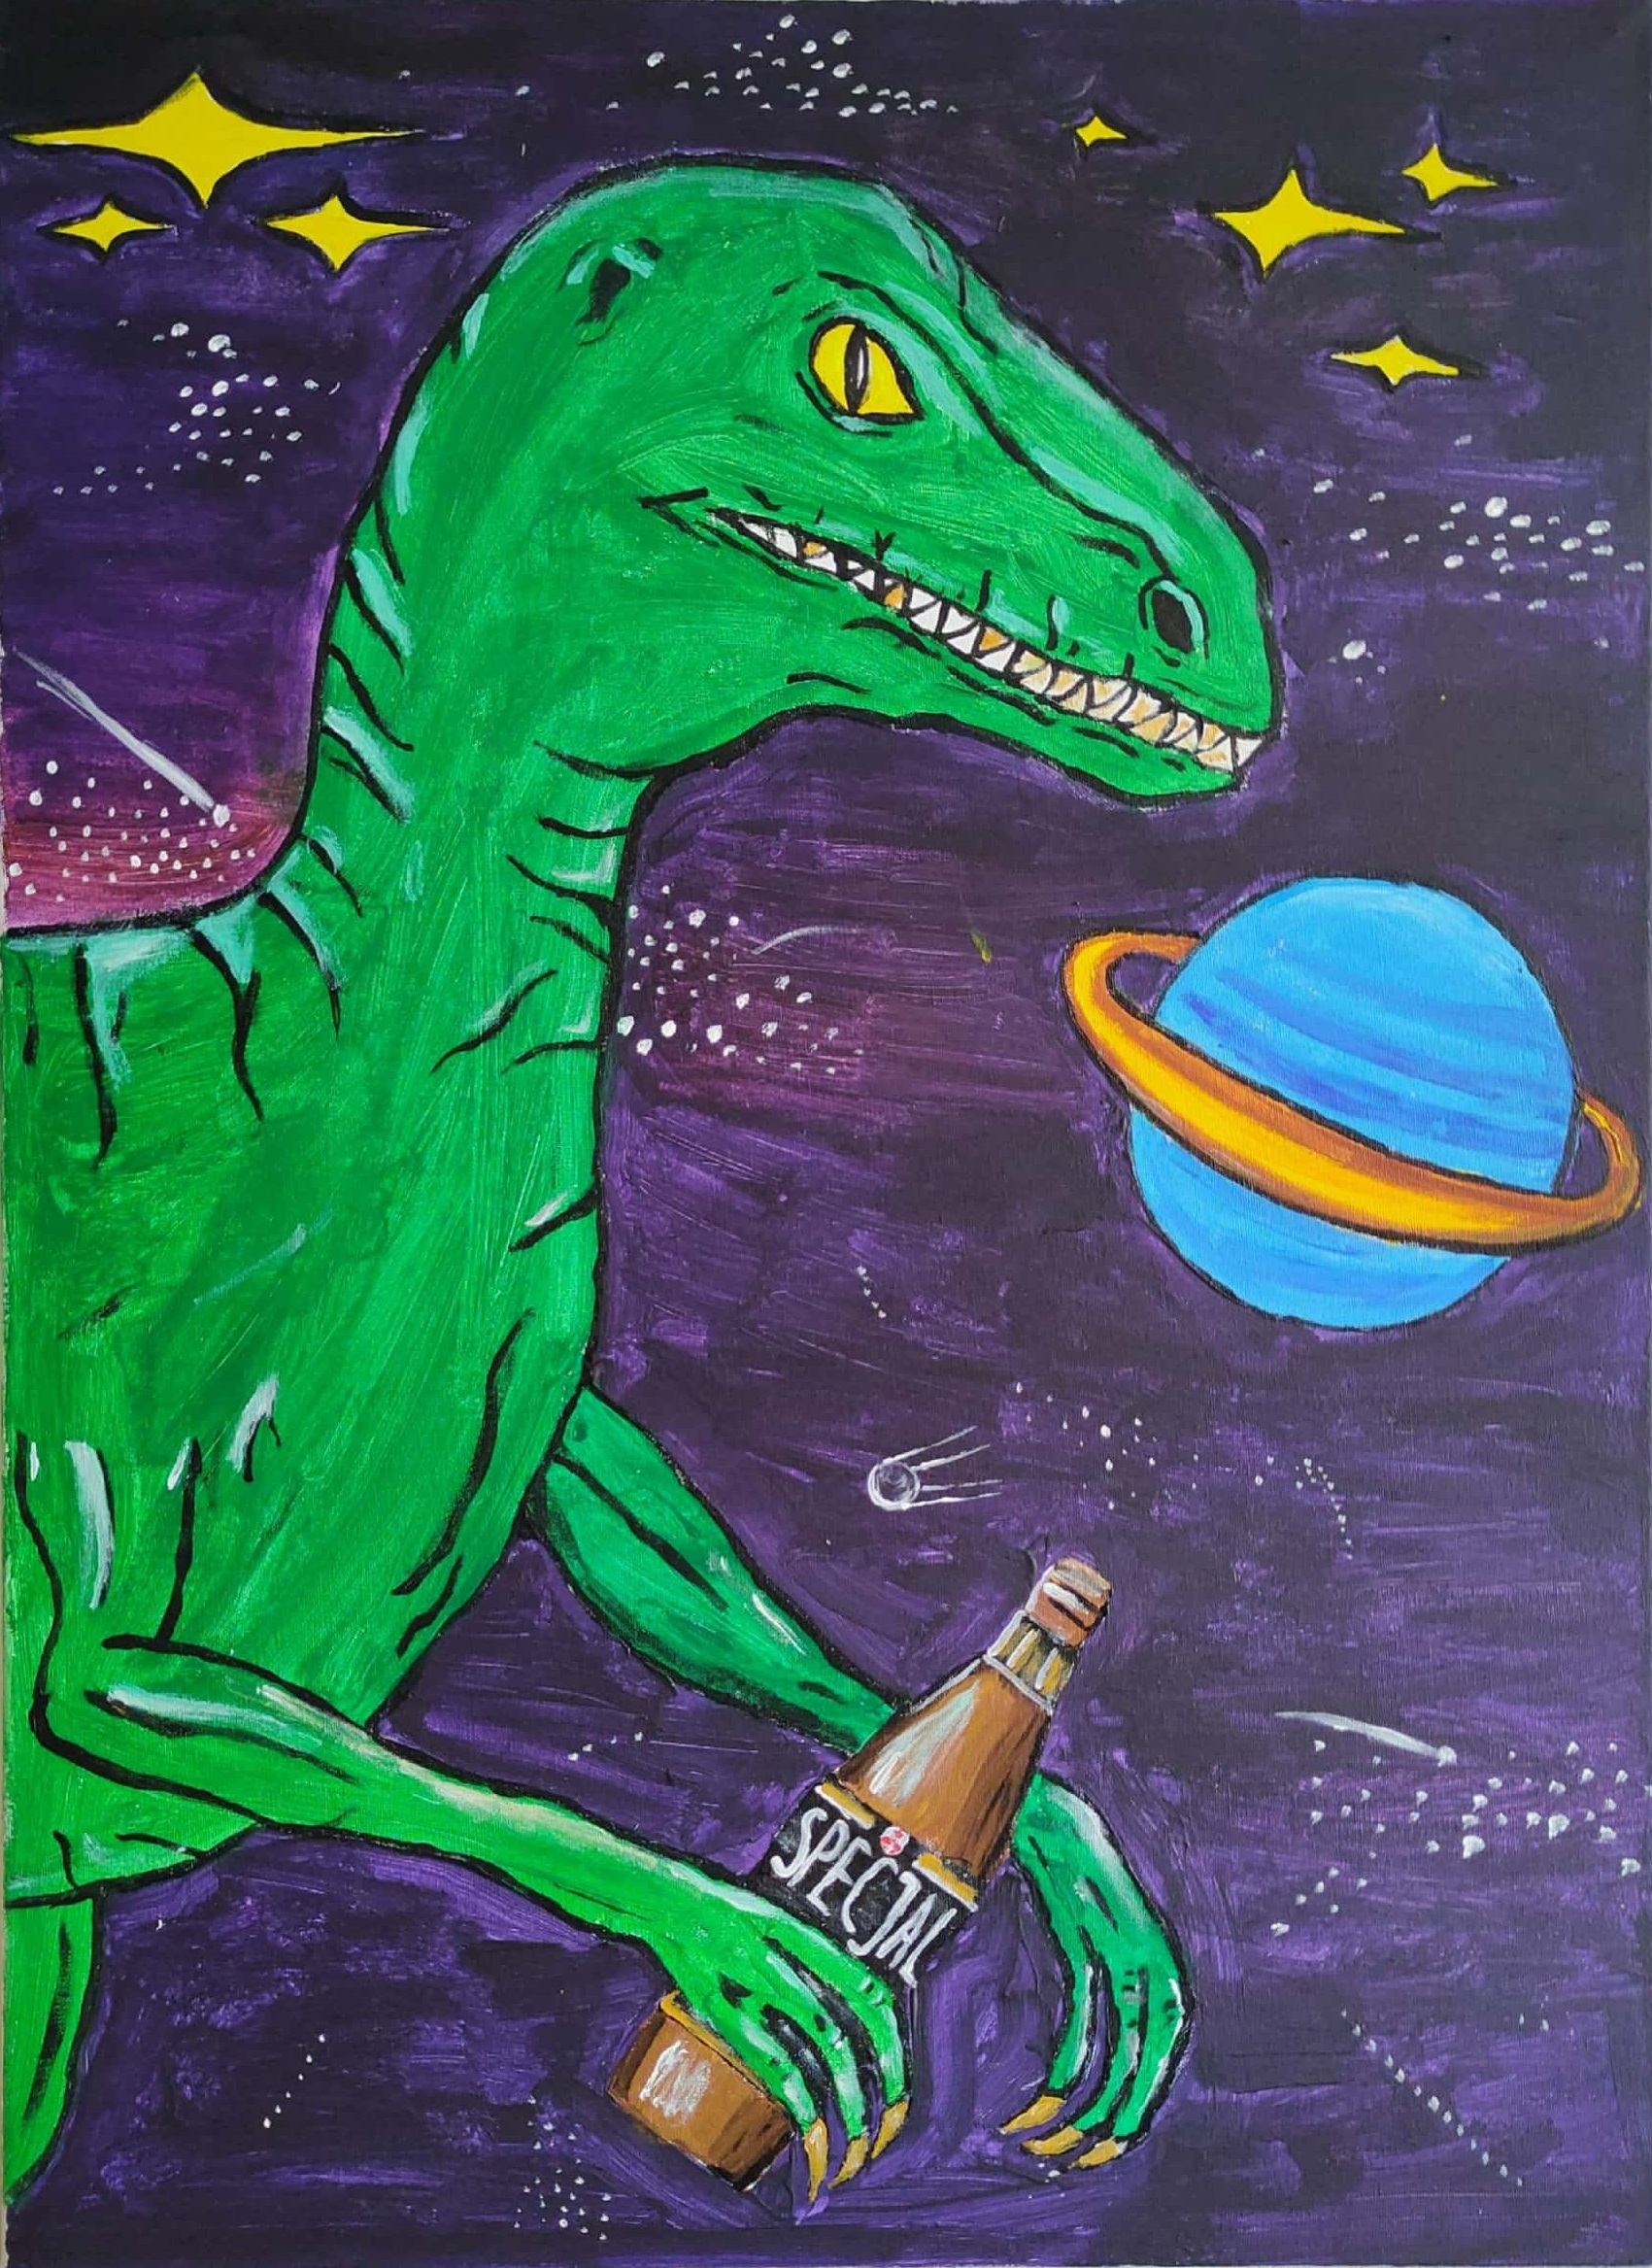

In [6]:
# Wyswietlenie obrazu

Image(filename=df_line_list[0][4]) 

In [7]:
# Tabela z rzeczywistymi klasami

table = [['Artysta','Styl','Gatunek','Wiek'], [df_line_list[0][6], df_line_list[0][7], df_line_list[0][8], df_line_list[0][9]]]
print(tabulate(table,headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤════════╤═══════════╤════════╕
│ Artysta   │ Styl   │ Gatunek   │ Wiek   │
╞═══════════╪════════╪═══════════╪════════╡
│ -         │ -      │ -         │ -      │
╘═══════════╧════════╧═══════════╧════════╛


In [8]:
# Przygotowanie obrazu do klasyfikacji

train_input_shape = (128, 128, 3)

painting_to_predict = ImageDataGenerator().flow_from_dataframe(
                                        dataframe = df_line,
                                        directory=None,
                                        x_col="filepath",
                                        y_col="Artist_name",
                                        target_size=train_input_shape[0:2],
                                        batch_size=1)

Found 1 validated image filenames belonging to 1 classes.


In [9]:
# Przewidywania na nizszym poziomie

artist_predict = model_Artist.predict(painting_to_predict)
style_predict = model_Style.predict(painting_to_predict)
genre_predict = model_Genre.predict(painting_to_predict)
century_predict = model_Century.predict(painting_to_predict)

In [10]:
# Przewidywania zebrane w dataframe

training_set_count = df.groupby(['Artist_name']).size().reset_index(name='count')
training_set_count = training_set_count[training_set_count['count'] > 250]
training_set_count = training_set_count[training_set_count['count'] != 350]

columns_style = ['Ekspresjonizm Abstrakcyjny', 'Taszyzm', 'Kubizm Analityczny', 'Art Noveau', 'Barok', 'Malarstwo Barwnych Płaszczyzn', 'Realizm Współczesny', 'Kubizm', 'Wczesny Renesans', 'Ekspresjonizm', 'Fowizm', 'Wysoki Renesans', 'Impresjonizm', 'Późny Renesans', 'Minimalizm', 'Prymitywizm', 'Nowy Realizm', 'Północny Renesans', 'Puentylizm', 'Pop Art', 'Postimpresjonizm', 'Realizm', 'Rokoko', 'Romantyzm', 'Symbolizm', 'Kubizm Syntetyczny', 'Ukiyo-e']
columns_genre = ['Abstrakcja', 'Pejzaż Miejski', 'Malarstwo Rodzajowe', 'Ilustracja', 'Krajobraz', 'Akt', 'Portret', 'Malarstwo Religijne', 'Szkic', 'Martwa Natura']
columns_century = ['XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX']
columns_artist = training_set_count['Artist_name'].tolist()

style_df = pd.DataFrame(style_predict, columns = columns_style)
genre_df = pd.DataFrame(genre_predict, columns = columns_genre)
artist_df = pd.DataFrame(artist_predict, columns = columns_artist)
century_df = pd.DataFrame(century_predict, columns = columns_century)

prediction_set = pd.concat([style_df, genre_df,artist_df,century_df ], axis=1)

In [11]:
# Główna klasyfikacja i jej prawdopodobieństwo

def top_pred (pred_df):
    pred1 = pred_df.idxmax(axis=1).tolist()
    pred1 = pred1[0]
    
    pred1_proba = pred_df.max(axis=1)
    pred1_proba = pred1_proba.tolist()
    pred1_proba = pred1_proba[0]
    pred1_proba = pred1_proba*100
    pred1_proba =  f"{pred1_proba:.2f}"
    
    return pred1, pred1_proba

In [12]:
# Przewidywane style i ich prawdopodobienstwa - nizszy poziom

style_df

,Ekspresjonizm Abstrakcyjny,Taszyzm,Kubizm Analityczny,Art Noveau,Barok,Malarstwo Barwnych Płaszczyzn,Realizm Współczesny,Kubizm,Wczesny Renesans,Ekspresjonizm,...,Północny Renesans,Puentylizm,Pop Art,Postimpresjonizm,Realizm,Rokoko,Romantyzm,Symbolizm,Kubizm Syntetyczny,Ukiyo-e
0,0.085208,0.006944,0.00301,0.038211,0.007656,0.003945,0.004768,0.007288,0.001566,0.21389,...,0.001144,0.013686,0.315376,0.051335,0.010067,0.001131,0.003501,0.011359,0.003164,0.007982


In [13]:
# Przewidywany styl nizszego poziomu

style1, style1_proba = top_pred(style_df)

print("Przewidywany styl niższego poziomu: " + style1 + ", prawdopodobieństwo: " + style1_proba)

Przewidywany styl niższego poziomu: Pop Art, prawdopodobieństwo: 31.54


In [14]:
# Przewidywane gatunki i ich prawdopodobienstwa - nizszy poziom

genre_df

,Abstrakcja,Pejzaż Miejski,Malarstwo Rodzajowe,Ilustracja,Krajobraz,Akt,Portret,Malarstwo Religijne,Szkic,Martwa Natura
0,0.765343,0.000025,0.001311,0.000018,0.00006,0.000006,0.000037,0.001161,0.000145,0.231894


In [15]:
# Przewidywany gatunek nizszego poziomu

genre1, genre1_proba = top_pred(genre_df)

print("Przewidywany gatunek niższego poziomu: " + genre1 + ", prawdopodobieństwo: " + genre1_proba)

Przewidywany gatunek niższego poziomu: Abstrakcja, prawdopodobieństwo: 76.53


In [16]:
# Przewidywani artysci i ich prawdopodobienstwa - nizszy poziom

artist_df

,Albrecht Durer,Alfred Sisley,Amedeo Modigliani,Boris Kustodiev,Camille Corot,Camille Pissarro,Childe Hassam,Claude Monet,David Burliuk,Edgar Degas,...,Rembrandt,Salvador Dali,Sam Francis,Thomas Eakins,Titian,Utagawa Kuniyoshi,Vasily Surikov,Vincent Van Gogh,William Merritt Chase,Zinaida Serebriakova
0,0.000159,0.001865,0.000111,0.009639,0.004053,0.004144,0.003904,0.019055,0.458725,0.002166,...,0.000444,0.007202,0.003923,0.015419,0.000109,0.007475,0.012945,0.001603,0.00233,0.011287


In [17]:
# Przewidywany artysta nizszego poziomu

artist1, artist1_proba = top_pred(artist_df)

print("Przewidywany artysa niższego poziomu: " + artist1 + ", prawdopodobieństwo: " + artist1_proba)

Przewidywany artysa niższego poziomu: David Burliuk, prawdopodobieństwo: 45.87


In [18]:
# Przewidywane wieki i ich prawdopodobienstwa - nizszy poziom

century_df

,XV,XVI,XVII,XVIII,XIX,XX
0,0.001189,0.001959,0.000335,0.000356,0.000571,0.99559


In [19]:
# Przewidywany wiek nizszego poziomu

century1, century1_proba = top_pred(century_df)

print("Przewidywany wiek niższego poziomu: " + century1 + ", prawdopodobieństwo: " + century1_proba)

Przewidywany wiek niższego poziomu: XX, prawdopodobieństwo: 99.56


In [23]:
#Style do klasyfikacji

columns_style = ['Ekspresjonizm Abstrakcyjny', 'Kubizm Analityczny', 'Art Noveau', 'Barok', 'Malarstwo Barwnych Płaszczyzn', 'Realizm Współczesny', 'Kubizm', 'Ekspresjonizm', 'Fowizm', 'Wysoki Renesans', 'Impresjonizm', 'Późny Renesans', 'Prymitywizm', 'Północny Renesans', 'Puentylizm', 'Postimpresjonizm', 'Realizm', 'Romantyzm', 'Symbolizm', 'Kubizm Syntetyczny', 'Ukiyo-e']

In [24]:
# Skalowanie
train_dataset_fp  = pd.read_csv('C:/wikiart/prediction_set_style.csv')
train_dataset_fp = train_dataset_fp.drop(['Unnamed: 0'], axis=1)
column_names = train_dataset_fp.columns
feature_names = column_names[:-1]

X = pd.concat([prediction_set,train_dataset_fp[feature_names]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled[0]

X_scaledNN = pd.DataFrame([X_scaled], columns = feature_names)

In [25]:
# Przewidywania stylu - wyzszy poziom - klasyfikator RF

style_RF_pred_proba = style_classificator.predict_proba(X_scaledNN)
style_RF_pred_proba = pd.DataFrame(style_RF_pred_proba, columns = columns_style)
style_RF_pred_proba

,Ekspresjonizm Abstrakcyjny,Kubizm Analityczny,Art Noveau,Barok,Malarstwo Barwnych Płaszczyzn,Realizm Współczesny,Kubizm,Ekspresjonizm,Fowizm,Wysoki Renesans,...,Późny Renesans,Prymitywizm,Północny Renesans,Puentylizm,Postimpresjonizm,Realizm,Romantyzm,Symbolizm,Kubizm Syntetyczny,Ukiyo-e
0,0.00245,0.000077,0.002069,0.036844,1.259637e-08,0.000009,0.00112,0.156302,0.000002,0.00007,...,0.00009,0.226154,0.000031,0.000137,0.003359,0.143781,0.000288,0.037626,0.000107,0.000013


In [26]:
# Przewidywany styl wyzszego poziomu - klasyfikator

style2k, style2k_proba = top_pred(style_RF_pred_proba)

print("Przewidywany styl klasyfikatorem wyzszego poziomu: " + style2k + ", prawdopodobieństwo: " + style2k_proba)

Przewidywany styl klasyfikatorem wyzszego poziomu: Impresjonizm, prawdopodobieństwo: 38.95


In [27]:
# Przewidywania stylu - wyzszy poziom - Sieć neuronowa

style_NN_pred_proba = style_NN_predictor.predict_proba(X_scaledNN)
style_NN_pred_proba = pd.DataFrame(style_NN_pred_proba, columns = columns_style)
style_NN_pred_proba

C:\Users\jarek\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,Ekspresjonizm Abstrakcyjny,Kubizm Analityczny,Art Noveau,Barok,Malarstwo Barwnych Płaszczyzn,Realizm Współczesny,Kubizm,Ekspresjonizm,Fowizm,Wysoki Renesans,...,Późny Renesans,Prymitywizm,Północny Renesans,Puentylizm,Postimpresjonizm,Realizm,Romantyzm,Symbolizm,Kubizm Syntetyczny,Ukiyo-e
0,1.911175e-08,1.526777e-18,0.000904,0.000169,2.596672e-16,9.908167e-34,0.000001,0.512634,5.356927e-22,4.642346e-17,...,3.312436e-10,0.068473,4.481885e-11,1.553023e-24,0.000022,0.337453,0.000032,0.076651,2.282247e-15,6.782629e-09


In [28]:
# Przewidywany styl wyzszego poziomu - sieć neuronowa

style2nn, style2nn_proba = top_pred(style_NN_pred_proba)

print("Przewidywany styl siecią wyzszego poziomu: " + style2nn + ", prawdopodobieństwo: " + style2nn_proba)

Przewidywany styl siecią wyzszego poziomu: Ekspresjonizm, prawdopodobieństwo: 51.26


In [29]:
# Przewidywania gatunku - wyzszy poziom - klasyfikator

genre_RF_pred_proba = genre_classificator.predict_proba(X_scaledNN)
genre_RF_pred_proba = pd.DataFrame(genre_RF_pred_proba, columns = columns_genre)
genre_RF_pred_proba

,Abstrakcja,Pejzaż Miejski,Malarstwo Rodzajowe,Ilustracja,Krajobraz,Akt,Portret,Malarstwo Religijne,Szkic,Martwa Natura
0,0.853512,0.006636,0.029892,0.001649,0.011472,0.005792,0.017606,0.007421,0.007147,0.058873


In [30]:
# Przewidywany gatunek - wyzszy poziom - klasyfikator

genre2k, genre2k_proba = top_pred(genre_RF_pred_proba)

print("Przewidywany gatunek klasyfikatorem wyzszego poziomu: " + genre2k + ", prawdopodobieństwo: " + genre2k_proba)

Przewidywany gatunek klasyfikatorem wyzszego poziomu: Abstrakcja, prawdopodobieństwo: 85.35


In [31]:
# Przewidywania gatunku - wyzszy poziom - Sieć

genre_NN_pred_proba = genre_NN_predictor.predict_proba(X_scaledNN)
genre_NN_pred_proba = pd.DataFrame(genre_NN_pred_proba, columns = columns_genre)
genre_NN_pred_proba

C:\Users\jarek\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,Abstrakcja,Pejzaż Miejski,Malarstwo Rodzajowe,Ilustracja,Krajobraz,Akt,Portret,Malarstwo Religijne,Szkic,Martwa Natura
0,0.999567,0.000206,5.472733e-13,0.000003,4.981477e-14,0.000009,0.000005,0.00003,0.00016,0.000021


In [32]:
# Przewidywany gatunek wyzszego poziomu - sieć neuronowa

genre2nn, genre2nn_proba = top_pred(genre_NN_pred_proba)

print("Przewidywany gatubek siecią wyzszego poziomu: " + genre2nn + ", prawdopodobieństwo: " + genre2nn_proba)

Przewidywany gatubek siecią wyzszego poziomu: Abstrakcja, prawdopodobieństwo: 99.96


In [33]:
# Przewidywania artysty - wyzszy poziom - klasyfikator RF

artist_RF_pred_proba = artist_classificator.predict_proba(X_scaledNN)
artist_RF_pred_proba = pd.DataFrame(artist_RF_pred_proba, columns = columns_artist)
artist_RF_pred_proba

,Albrecht Durer,Alfred Sisley,Amedeo Modigliani,Boris Kustodiev,Camille Corot,Camille Pissarro,Childe Hassam,Claude Monet,David Burliuk,Edgar Degas,...,Rembrandt,Salvador Dali,Sam Francis,Thomas Eakins,Titian,Utagawa Kuniyoshi,Vasily Surikov,Vincent Van Gogh,William Merritt Chase,Zinaida Serebriakova
0,0.003029,0.002285,0.005051,0.0101,0.001974,0.003099,0.000753,0.002461,0.64556,0.00246,...,0.00281,0.005671,0.066021,0.002063,0.001407,0.00011,0.002463,0.004991,0.000316,0.005766


In [34]:
# Przewidywany artysta - wyzszy poziom - klasyfikator

artist2k, artist2k_proba = top_pred(artist_RF_pred_proba)

print("Przewidywany artysta klasyfikatorem wyzszego poziomu: " + artist2k + ", prawdopodobieństwo: " + artist2k_proba)

Przewidywany artysta klasyfikatorem wyzszego poziomu: David Burliuk, prawdopodobieństwo: 64.56


In [35]:
# Przewidywania artysty - wyzszy poziom - Sieć

artist_NN_pred_proba = artist_NN_predictor.predict_proba(X_scaledNN)
artist_NN_pred_proba = pd.DataFrame(artist_NN_pred_proba, columns = columns_artist)
artist_NN_pred_proba

C:\Users\jarek\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,Albrecht Durer,Alfred Sisley,Amedeo Modigliani,Boris Kustodiev,Camille Corot,Camille Pissarro,Childe Hassam,Claude Monet,David Burliuk,Edgar Degas,...,Rembrandt,Salvador Dali,Sam Francis,Thomas Eakins,Titian,Utagawa Kuniyoshi,Vasily Surikov,Vincent Van Gogh,William Merritt Chase,Zinaida Serebriakova
0,2.572157e-21,2.610198e-17,3.405412e-20,1.428093e-07,5.029660e-08,6.403317e-21,3.749469e-21,3.041649e-23,0.995661,4.477996e-16,...,8.305114e-29,6.735011e-20,6.435751e-10,1.334919e-18,4.912259e-19,2.978063e-10,9.807887e-17,5.195025e-15,4.035926e-14,7.752438e-09


In [36]:
# Przewidywany artysta wyzszego poziomu - sieć neuronowa

artist2nn, artist2nn_proba = top_pred(artist_NN_pred_proba)

print("Przewidywany artysta siecią wyzszego poziomu: " + artist2nn + ", prawdopodobieństwo: " + artist2nn_proba)

Przewidywany artysta siecią wyzszego poziomu: David Burliuk, prawdopodobieństwo: 99.57


In [37]:
# Przewidywania wieku - wyzszy poziom - klasyfikator

century_RF_pred_proba = century_classificator.predict_proba(X_scaledNN)
century_RF_pred_proba = pd.DataFrame(century_RF_pred_proba, columns = columns_century)
century_RF_pred_proba

,XV,XVI,XVII,XVIII,XIX,XX
0,0.000001,6.460990e-08,0.000332,3.339772e-08,0.000467,0.9992


In [38]:
# Przewidywany wiek - wyzszy poziom - klasyfikator

century2k, century2k_proba = top_pred(century_RF_pred_proba)

print("Przewidywany wiek klasyfikatorem wyzszego poziomu: " + century2k + ", prawdopodobieństwo: " + century2k_proba)

Przewidywany wiek klasyfikatorem wyzszego poziomu: XX, prawdopodobieństwo: 99.92


In [39]:
# Przewidywania wieku - wyzszy poziom - Sieć

century_NN_pred_proba = century_NN_predictor.predict_proba(X_scaledNN)
century_NN_pred_proba = pd.DataFrame(century_NN_pred_proba, columns = columns_century)
century_NN_pred_proba

,XV,XVI,XVII,XVIII,XIX,XX
0,5.483471e-242,3.025540e-303,1.554382e-218,5.140565e-241,0.0,1.0


In [40]:
# Przewidywany wiek wyzszego poziomu - sieć neuronowa

century2nn, century2nn_proba = top_pred(century_NN_pred_proba)

print("Przewidywany wiek siecią wyzszego poziomu: " + century2nn + ", prawdopodobieństwo: " + century2nn_proba)

Przewidywany wiek siecią wyzszego poziomu: XX, prawdopodobieństwo: 100.00


In [41]:
# Zebranie wszystkiego w tabeli

table = [['','Artysta','Styl','Gatunek','Wiek'], 
         ['Rzeczywisty', df_line_list[0][5], df_line_list[0][6], df_line_list[0][7], df_line_list[0][8]], 
         ['Przewidywany\n-Poziom Niższy', artist1 + '(' + artist1_proba + '%)', style1 + '(' + style1_proba + '%)', genre1 + '(' + genre1_proba + '%)', century1 + '(' + century1_proba + '%)' ],
         ['Przewidywany\n-Poziom Wyższy\n-Klasyfikator', artist2k + '(' + artist2k_proba + '%)', style2k + '(' + style2k_proba + '%)', genre2k + '(' + genre2k_proba + '%)', century2k + '(' + century2k_proba + '%)' ],
         ['Przewidywany\n-Poziom Wyższy\n-Sieć Neuronowa', artist2nn + '(' + artist2nn_proba + '%)', style2nn + '(' + style2nn_proba + '%)', genre2nn + '(' + genre2nn_proba + '%)', century2nn + '(' + century2nn_proba + '%)' ]]        
print(tabulate(table,headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════╤═══════════════════════════════╤═══════════════════════╤════════════════════╤═════════════╕
│                 │ Artysta                       │ Styl                  │ Gatunek            │ Wiek        │
╞═════════════════╪═══════════════════════════════╪═══════════════════════╪════════════════════╪═════════════╡
│ Rzeczywisty     │ Aleksandra Mochel Modzelewska │ -                     │ -                  │ -           │
├─────────────────┼───────────────────────────────┼───────────────────────┼────────────────────┼─────────────┤
│ Przewidywany    │ David Burliuk(45.87%)         │ Pop Art(31.54%)       │ Abstrakcja(76.53%) │ XX(99.56%)  │
│ -Poziom Niższy  │                               │                       │                    │             │
├─────────────────┼───────────────────────────────┼───────────────────────┼────────────────────┼─────────────┤
│ Przewidywany    │ David Burliuk(64.56%)         │ Impresjonizm(38.95%)  │ Abstrakcja(85.35%) │ XX(99.92%)  │
│